# Statistics, Probability, and Inference
**Resources**
* [Interactive Student's t-Distribution](https://homepage.divms.uiowa.edu/~mbognar/applets/t.html)
* [Understanding the t-distribution and its normal approximation](https://rpsychologist.com/d3/tdist/)
* [Central Limit Theorem - statisticsbyjim.com](https://statisticsbyjim.com/basics/central-limit-theorem/)
* [The Central Limit Theorem and its Implications for Statistical Inference](https://tutorials.methodsconsultants.com/posts/the-central-limit-theorem-and-its-implications-for-statistical-inference/)
* [Intuition behind the Definition of Conditional Probability (for 2 Events)
](https://math.stackexchange.com/questions/294580/intuition-behind-the-definition-of-conditional-probability-for-2-events)

# Parametric vs. Nonparametric Statistics

**Parametric statistics** [(wiki)](https://en.wikipedia.org/wiki/Parametric_statistics) assumes certain things about the population we are studying and allows us to model probabilities with a fixed set of paramters. For example, a normal distribution has two parameters: the mean and the standard deviation.

Typically parametric methods are applied in cases where the population is approximately normal or can be approximated using a normal distribution via the **central limit theorem**. 

Common parametric assumptions:
* confidence interval for a population mean, with known standard deviation
* confidence interval for a population mean, with unknown standard deviation
* confidence interval for a population variance
* confidence interval for the difference of two means, with unknown standard deviation

Parametric methods
* **t-test**
* Pearson correlation test
* most well known statistical methods

**Nonparametric statistics** [(wiki)](https://en.wikipedia.org/wiki/Nonparametric_statistics) is not based solely on parametrized families of probability distributions (parameters like mean and variance). Nonparametric statistics is based on either being distribution-free or having a specified distribution but with the distribution's parameters unspecified. Nonparametric statistics includes both descriptive statistics and statistical inference.

Nonparametric models
* A histogram is a simple nonparametric estimate of a probability distribution.
* Kernel density estimation provides better estimates of the density than histograms.
* K Nearest Neighbors classify the unseen instance based on the K points in the training set which are nearest to it.
* A support vector machine (with a Gaussian kernel) is a nonparametric large-margin classifier.

Nonparametric methods
* chi-squared test
* Sign test for population mean
* Bootstrapping techniques
* U test for two independent means
* Spearman correlation test

# The Central Limit Theorem, t-distributions, and t-tests

The **Central Limit Theorem** states that regardless of the distribution of a continuous measure in a population, the means of repeated random samples from that population will themselves be normally distributed. With larger sample sizes, the distribution of sample means will more closely approximate a normal distribution and cluster more tightly around the population mean.

The **t-scores** of repeated samples from a population are distributed according to the **t-distribution**. The **t-distribution** has one parameter, its **degrees of freedom**, defined as `sample_size - 1` or `sample_1_size + sample_2_size - 2` for two-sample tests. With larger sample sizes, the **t-distribution** will converge on a **standard normal distribution** (mean 0, standard deviation 1).

As a rule of thumb, sample sizes of greater than **30 items** will produce a sufficiently standard normal **t-distribution**.

A **t-test** most commonly compares the mean and variance of one or two samples to determine whether they are significantly different and not due to random chance. In a **t-test**, the dependent variable is continuous (interval/ratio) and the independent variable is categorical/nominal.

Each **t-test** returns a single **t-score**. We compare this **t-score** to the **critical t-value**, which is the value below (if negative critical t) or above which the area under our **t-distribution** is equal to our desired confidence value, usually 0.05. Depending on our hypothesis, we reject the null hypothesis if our **t-score** is below and/or above the **critical t-value**.

**t-test** come in three variants. **One-sample tests** compare results from a single sample against a known or hypothesized population. **Two-sample tests** compare two different and _independent_ samples against one another. **Paired tests** are a special type of two-sample tests where, to control other variables, observations are paired and the differences between those paired observations becomes the sample.

Examples:
* one-sample test
    * (shown in this notebook) a survey asking whether respondents prefer Coke or Pepsi, modeled as 0 or 1. The null hypothesis population mean would be 0.5.
* two-sample test
    * whether smokers and non-smokers (independent variable) have differing frontal lobe brain size (dependent variable)
    * (shown in this notebook) whether democrats and republicans (independent variable) vote differently on a given topic (dependent variable)

### What's available in SciPy?

As we delve into statistics, we'll be using more libraries - in particular the [stats package from SciPy](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html).

In [1]:
import random
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

[name for name in dir(stats) if not name.startswith('_')]

['absolute_import',
 'alpha',
 'anderson',
 'anderson_ksamp',
 'anglit',
 'ansari',
 'arcsine',
 'argus',
 'bartlett',
 'bayes_mvs',
 'bernoulli',
 'beta',
 'betaprime',
 'binned_statistic',
 'binned_statistic_2d',
 'binned_statistic_dd',
 'binom',
 'binom_test',
 'boltzmann',
 'boxcox',
 'boxcox_llf',
 'boxcox_normmax',
 'boxcox_normplot',
 'bradford',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'chi2_contingency',
 'chisquare',
 'circmean',
 'circstd',
 'circvar',
 'combine_pvalues',
 'contingency',
 'cosine',
 'crystalball',
 'cumfreq',
 'describe',
 'dgamma',
 'dirichlet',
 'distributions',
 'division',
 'dlaplace',
 'dweibull',
 'energy_distance',
 'entropy',
 'erlang',
 'expon',
 'exponnorm',
 'exponpow',
 'exponweib',
 'f',
 'f_oneway',
 'fatiguelife',
 'find_repeats',
 'fisher_exact',
 'fisk',
 'fligner',
 'foldcauchy',
 'foldnorm',
 'frechet_l',
 'frechet_r',
 'friedmanchisquare',
 'gamma',
 'gausshyper',
 'gaussian_kde',
 'genexpon',
 'genextreme',
 'gengamma',
 'genhalf

norm
mean: 0.0
std:  1.0
var:  1.0
t
mean: 0.0
std:  1.2909944487358056
var:  1.6666666666666667


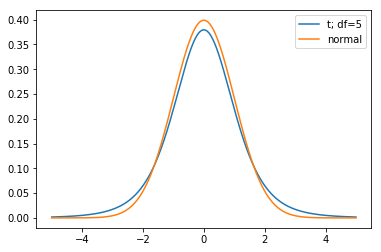

In [2]:
# As usual, lots of stuff here! 
def describe(x):
    print(f'mean: {x.mean()}')
    print(f'std:  {x.std()}')
    print(f'var:  {x.var()}')

# There's our friend, the normal distribution
norm_dist = stats.norm()
print('norm')
describe(norm_dist)

# And a new friend - t
t_dist = stats.t(5)  # 5 is df "shape" parameter
print('t')
describe(t_dist)

x = np.linspace(-5, 5, 5000)
plt.plot(x, t_dist.pdf(x), label='t; df=5');
plt.plot(x, norm_dist.pdf(x), label='normal')
plt.legend();

The t-distribution is "normal-ish" - the larger the parameter (which reflects its degrees of freedom - more input data/features will increase it), the closer to true normal.

t distribution, df=1
mean: 0.0
std:  inf
var:  inf
t distribution, df=2
mean: 0.0
std:  inf
var:  inf
t distribution, df=5
mean: 0.0
std:  1.2909944487358056
var:  1.6666666666666667
t distribution, df=1000
mean: 0.0
std:  1.0010015025043828
var:  1.002004008016032


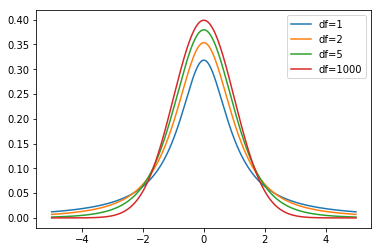

In [3]:
x = np.linspace(-5, 5, 5000)

for df in [1, 2, 5, 1000]:
    t_dist = stats.t(df)
    print(f't distribution, df={df}')
    describe(t_dist)
    plt.plot(x, t_dist.pdf(x), label=f'df={df}')

plt.legend();

Why is it different from normal? To better reflect the tendencies of small data and situations with unknown population standard deviation. In other words, the normal distribution is still the nice pure ideal in the limit (thanks to the **central limit theorem**), but the t-distribution is much more useful in many real-world situations.

<img src="https://upload.wikimedia.org/wikipedia/commons/4/42/William_Sealy_Gosset.jpg" width=250px>

History sidenote - this is "Student". His real name is William Sealy Gosset, and he published under the pen name "Student" because he was not an academic. He was a brewer, working at Guinness and using trial and error to determine the best ways to yield barley. He's also proof that, even 100 years ago, you don't need official credentials to do real data science!

## One-Sample t-test from Scratch

We'll generate our own data, so we can know and alter the "ground truth" that the t-test should find. We will learn about p-values and how to interpret "statistical significance" based on the output of a hypothesis test.

In [4]:
# Coke or Pepsi experiment
# This will be represented as a binomial random variable
# 0 = Likes Pepsi
# 1 = Likes Coke

# We want a list of 30 observations (sample size n=30)
# Start by generating random data
# help(random.randint)
random.seed(10)
# sample_data = [random.randint(0, 1) for _ in range(30)]
sample_data = [0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
               0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
               1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0]
print(sample_data)

[0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0]


In [5]:
sample_data = pd.Series(sample_data)
sample_data.describe()

count    50.000000
mean      0.660000
std       0.478518
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
dtype: float64

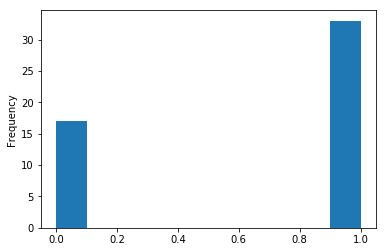

In [6]:
sample_data.plot.hist();

In [7]:
# Now with confidence!
# help(stats.ttest_1samp)
stats.ttest_1samp(a=sample_data, popmean=0.5)

Ttest_1sampResult(statistic=2.364321853156195, pvalue=0.02207003200903075)

In [8]:
# t score from scratch
def var(sample, mean, ddof=1):
    """
    ddof=1 enforces Bessel's correction, which is used for samples rather than
    entire populations (ddof=0)
    """
    std = 0
    for obs in sample:
        std += (obs - mean)**2

    return std / (len(sample) - ddof)

def calculate_t_stat(sample, null_hyp):
    sample_mean = sum(sample) / len(sample)

    sample_var = var(sample, sample_mean) # aka mean of squared differences

    sample_std_dev = math.sqrt(sample_var)

    sample_std_err = sample_std_dev / math.sqrt(len(sample))

    return (sample_mean - null_hyp) / sample_std_err

In [9]:
assert math.isclose(calculate_t_stat(sample_data, null_hyp=0.5),
                    stats.ttest_1samp(sample_data, 0.5)[0],
                    abs_tol=1e-8)

assert sample_data.var(ddof=1) == var(sample_data, sample_data.mean(), ddof=1)

In a two-sided test, the **p value** is the proportion of the t-distribution that lies below our negative t statistic **or** above our positive t statistic. 

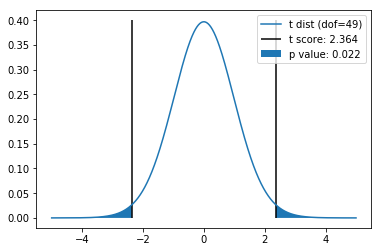

In [10]:
dof = len(sample_data) - 1
t_dist = stats.t(dof)
result = stats.ttest_1samp(a=sample_data, popmean=0.5)
tstat = result[0]
p = t_dist.cdf(-1 * tstat) * 2 # .cdf gives the area under the dist curve
# p = result[1]  # or get it from results

x = np.linspace(-5, 5, 5000)
plt.plot(x, t_dist.pdf(x), label=f't dist (dof={dof})')
plt.vlines([-tstat, tstat], ymin=0, ymax=0.40, 
           label=f't score: {round(tstat, 3)}')
plt.fill_between(x, t_dist.pdf(x), where=np.logical_or(x<-tstat, tstat<x), 
                 label=f'p value: {round(p, 3)}')
plt.legend();

### Interpretation

In a two-tailed test, our threshold for statistical significance is `0.10`. With a **p value** of `0.022`, we can reject our null hypothesis that the population equally prefers Coke and Pepsi. In this case there was a clear preference for Coke (represented by 1 in our sample), although our test was not conducted to determine _which_ product is prefered - only to test whether _either one_ of the products is prefered over the other.

In [11]:
# On your own optional stretch goal:
# Figure out how to get t.cdf to give us 1/2 tailed tests and not just the base

# Put the entire above "experiment" in a loop
# and run it a bunch of times for a bunch of different seeds
# and see how often the p value holds

## Assignment - apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [0]:
import re
import requests
from typing import Tuple

from bs4 import BeautifulSoup


def get_uci_data_urls(url: str) -> Tuple[str]:
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')

    match = soup.find('a', string='Data Folder', href=True)

    if not match:
    return '', ''

    db_url = match['href']
    url = url.split('/')[:-2]
    db_url = '/'.join(url) + db_url[2:]

    r = requests.get(db_url)
    soup = BeautifulSoup(r.text, 'html.parser')

    data_url = soup.find(string=re.compile(".data"), href=True)
    if data_url:
    data_url = db_url + data_url['href']

    names_url = soup.find(string=re.compile(".names"), href=True)
    if names_url:
    names_url = db_url + names_url['href']

    return data_url or '', names_url or ''

In [0]:
import pandas as pd
import numpy as np
import scipy

uci_url = 'https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records'
data_url, names_url = get_uci_data_urls(uci_url)

cols = [
  'Class Name',
  'handicapped-infants',
  'water-project-cost-sharing',
  'adoption-of-the-budget-resolution',
  'physician-fee-freeze',
  'el-salvador-aid',
  'religious-groups-in-schools',
  'anti-satellite-test-ban',
  'aid-to-nicaraguan-contras',
  'mx-missile',
  'immigration',
  'synfuels-corporation-cutback',
  'education-spending',
  'superfund-right-to-sue',
  'crime',
  'duty-free-exports',
  'export-administration-act-south-africa'
]

df = pd.read_csv(data_url, names=cols)

In [0]:
df.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
df = df.replace({'?':np.nan, 'n':0, 'y':1})
df.isnull().sum() / len(df)

Class Name                                0.000000
handicapped-infants                       0.027586
water-project-cost-sharing                0.110345
adoption-of-the-budget-resolution         0.025287
physician-fee-freeze                      0.025287
el-salvador-aid                           0.034483
religious-groups-in-schools               0.025287
anti-satellite-test-ban                   0.032184
aid-to-nicaraguan-contras                 0.034483
mx-missile                                0.050575
immigration                               0.016092
synfuels-corporation-cutback              0.048276
education-spending                        0.071264
superfund-right-to-sue                    0.057471
crime                                     0.039080
duty-free-exports                         0.064368
export-administration-act-south-africa    0.239080
dtype: float64

In [0]:
def assess_t_stats(df, **kwargs):
    results = []
    for col in df.select_dtypes(include=np.number):
        result = scipy.stats.ttest_ind(df.loc[df['Class Name']=='democrat', col],
                                       df.loc[df['Class Name']=='republican', col],
                                       **kwargs)
        results.append({'issue':col,
                        'statistic':result.statistic,
                        'pvalue':result.pvalue})

    return pd.DataFrame(results).sort_values(['pvalue', 'statistic'])

In [0]:
assess_t_stats(df, nan_policy='omit', equal_var=False)

,issue,pvalue,statistic
3,physician-fee-freeze,8.820761e-193,-56.704806
4,el-salvador-aid,2.898373e-79,-23.907288
2,adoption-of-the-budget-resolution,1.946704e-69,22.793246
11,education-spending,3.568751e-62,-20.724816
13,crime,6.862816e-58,-19.927656
7,aid-to-nicaraguan-contras,2.288121e-52,18.254856
8,mx-missile,4.289262e-51,17.409048
14,duty-free-exports,3.812922e-38,14.376245
12,superfund-right-to-sue,7.597900e-38,-14.352567
6,anti-satellite-test-ban,1.362781e-29,12.467493


Every issue except `immigration` and `water-project-cost-sharing` had statistically different voting across democrat and republican groups. Negative t-statistics map to greater republican support.

Since the dataset columns contain 3-25% no-votes, I wonder whether either party disproportionately did not vote on any given topic.

In [0]:
df_voted = ~df.iloc[:, 1:50].isnull() * 1

for col in df_voted:
    df_voted[col] = pd.to_numeric(df_voted[col])

df_voted = pd.concat([df['Class Name'], df_voted], axis=1)

assess_t_stats(df_voted, nan_policy='omit', equal_var=False)

,issue,pvalue,statistic
15,export-administration-act-south-africa,0.000006,-4.576925
8,mx-missile,0.004804,-2.835053
7,aid-to-nicaraguan-contras,0.014734,2.458408
4,el-salvador-aid,0.097723,-1.659582
5,religious-groups-in-schools,0.117175,-1.569881
0,handicapped-infants,0.293876,-1.050963
3,physician-fee-freeze,0.408738,-0.826957
14,duty-free-exports,0.641402,0.466165
1,water-project-cost-sharing,0.651043,0.452715
10,synfuels-corporation-cutback,0.689333,0.400109


It appears there may have been strategic non-voting in `export-administration-act-south-africa` and `mx-missile`.